In [10]:
import cv2
import numpy as np

In [11]:
import google.colab.patches as goog
from google.colab.patches import cv2_imshow

In [12]:
# Load the video
video_path = '/content/A1606b0e6_0 (29).mp4'  # Replace with your video file
cap = cv2.VideoCapture(video_path)

In [13]:
# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [14]:
# Initialize SIFT or ORB
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

In [15]:
# Define output video writer if saving output
output_path = 'processed_football_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

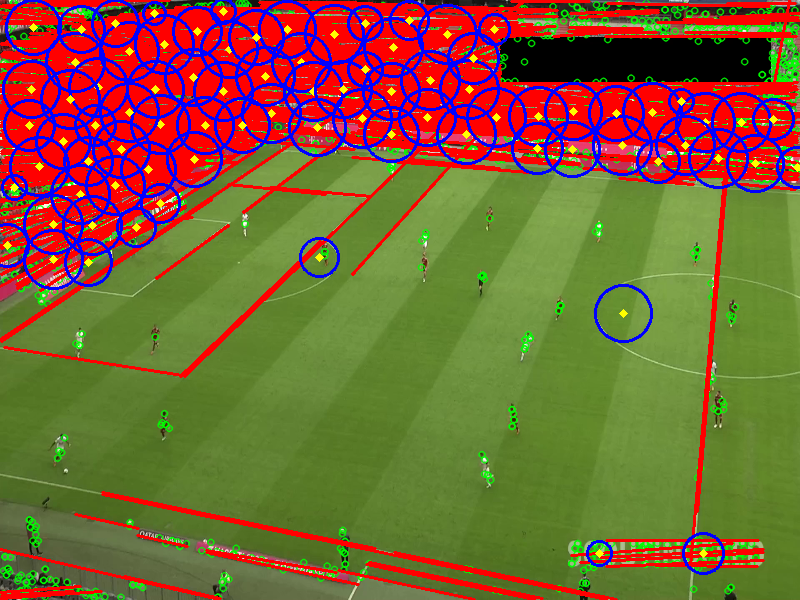

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break

    # Resize frame for faster processing
    frame_resized = cv2.resize(frame, (800, 600))

    # Convert to grayscale
    gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # --- Step 1: Detect keypoints using SIFT or ORB ---
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    frame_with_keypoints = cv2.drawKeypoints(frame_resized, keypoints, None, color=(0, 255, 0))

    # --- Step 2: Detect edges using Canny Edge Detection ---
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    # --- Step 3: Detect lines using Hough Transform (for pitch lines) ---
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame_with_keypoints, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # --- Step 4: Detect the ball using Circle Detection (Hough Transform) ---
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=10, maxRadius=30)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the detected circle
            cv2.circle(frame_with_keypoints, (i[0], i[1]), i[2], (255, 0, 0), 2)
            # Draw the center of the circle
            cv2.circle(frame_with_keypoints, (i[0], i[1]), 2, (0, 255, 255), 3)

    # Display the processed frame
    goog.cv2_imshow(frame_with_keypoints)

    # Write the processed frame to output video
    out.write(frame_with_keypoints)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [ ]:
# # Process each frame in the video
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         print("End of video or error reading frame.")
#         break

#     # Resize frame for faster processing
#     frame_resized = cv2.resize(frame, (800, 600))

#     # Convert to grayscale
#     gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

#     # --- Step 1: Detect keypoints using SIFT or ORB ---
#     keypoints, descriptors = sift.detectAndCompute(gray, None)
#     frame_with_keypoints = cv2.drawKeypoints(frame_resized, keypoints, None, color=(0, 255, 0))

#     # --- Step 2: Detect edges using Canny Edge Detection ---
#     edges = cv2.Canny(gray, threshold1=50, threshold2=150)

#     # --- Step 3: Detect lines using Hough Transform (for pitch lines) ---
#     lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
#     if lines is not None:
#         for line in lines:
#             x1, y1, x2, y2 = line[0]
#             cv2.line(frame_with_keypoints, (x1, y1), (x2, y2), (0, 0, 255), 2)

#     # --- Step 4: Detect the ball using Circle Detection (Hough Transform) ---
#     circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
#                                param1=50, param2=30, minRadius=10, maxRadius=30)
#     if circles is not None:
#         circles = np.uint16(np.around(circles))
#         for i in circles[0, :]:
#             # Draw the detected circle
#             cv2.circle(frame_with_keypoints, (i[0], i[1]), i[2], (255, 0, 0), 2)
#             # Draw the center of the circle
#             cv2.circle(frame_with_keypoints, (i[0], i[1]), 2, (0, 255, 255), 3)

#     # Display the processed frame
#     goog.cv2_imshow(frame_with_keypoints)

#     # Write the processed frame to output video
#     out.write(frame_with_keypoints)

#     # Exit on 'q' key press
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

In [ ]:
# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("Processing complete. Output saved to:", output_path)
